In [1]:
# numerical libraries
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

We have the integral:
$$
    X_t = e^{-2t}X_0 + 2\int_0^te^{-2(t-s)}dW_s = e^{-2t}\bigg(
        X_0 + 2\int_0^te^{2s}dW_s
    \bigg)
$$ with $X_0 \sim \mathcal{N}(0,1)$.

The only part that involves randomness is the simulation of the stochastic integral. Let $t_0, t_1,t_2,\cdots, t_N$ be a time grid with $t_0 = 0, t_{j+1}-t_j = \Delta t$, then:
$$
    \int_0^{t_j}e^{2s}dW_s \approx \sum_{i=0}^{j-1}e^{2t_i}[B_{t_{i+1}} - B_{t_i}]
$$

Here $B_{t_{i+1}}-B_{t_i}\sim\mathcal{N}(0,\Delta t)$ are i.i.d. We implement one sample path on $t\in[0,1]$ below; the process is simulated with $10000$ grid points.

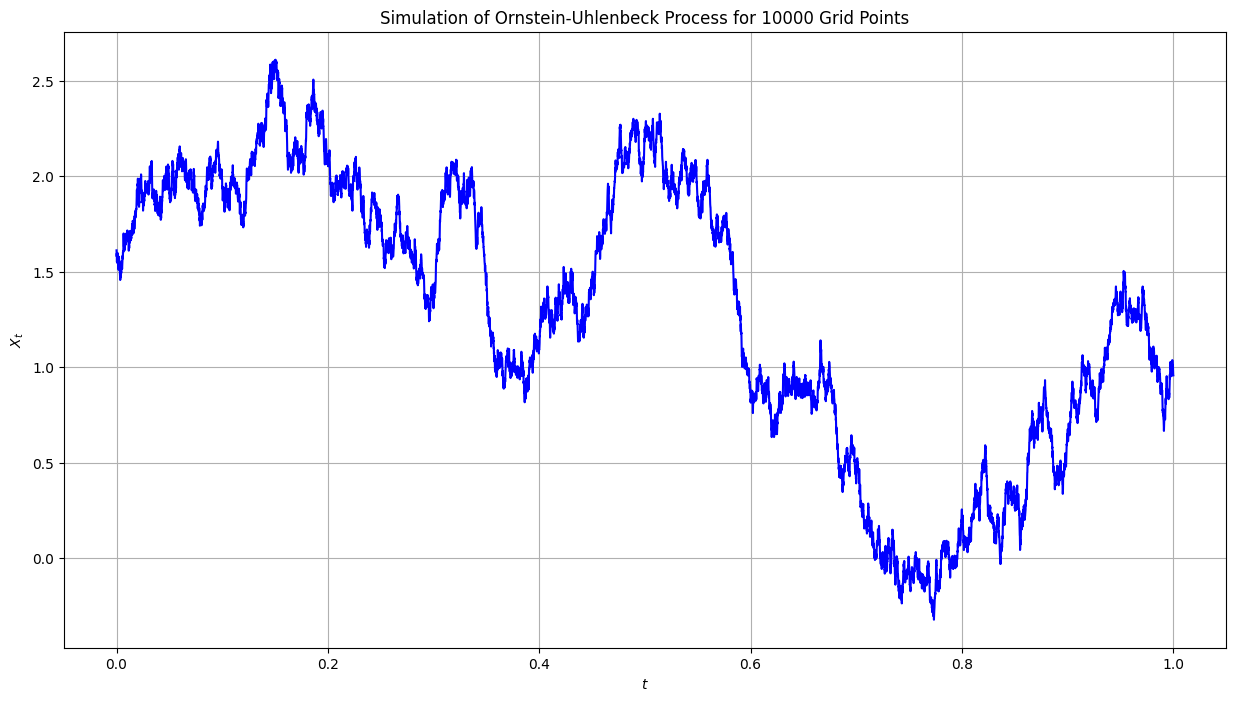

In [3]:
# for reproducibility
np.random.seed(1)
N = 10000
# initial condition
x0 = np.random.normal(0, 1, 1)
t_grid = np.linspace(0, 1, N)
dt = t_grid[1]-t_grid[0]
dWt = np.random.normal(loc=0.0, scale=np.sqrt(dt), size=N)
# Ito integral on grid points
ito = np.exp(-2*t_grid) * (x0 + 2 * np.cumsum(np.exp(2*t_grid) * dWt))
# plotting
plt.figure(1, figsize=(15, 8))
plt.plot(t_grid, ito, color='blue');
plt.grid(True); plt.xlabel(r'$t$'); plt.ylabel(r'$X_t$');
plt.title("Simulation of Ornstein-Uhlenbeck Process for {} Grid Points".format(N));

## Verifying Covariance

The resulting visualization will be a 3D plane, since we have access to discrete values $X_{t_j}$ on grid points. We compute the estimated covariance using 10000 sample paths, each path is generated using 10000 grid points.

In [4]:
# simulate 5000 paths
np.random.seed(12)
N = 10000
sample_size = 10000
t_grid = np.linspace(0, 1, N)
data = np.zeros([N, sample_size])
for i in range(sample_size):
    # draw a sample path
    x0 = np.random.normal(0, 1, 1)
    dWt = np.random.normal(loc=0.0, scale=np.sqrt(dt), size=N)
    ito = np.exp(-2*t_grid) * (x0 + 2 * np.cumsum(np.exp(2*t_grid) * dWt))
    data[:, i] = ito

In [5]:
data.shape

(10000, 10000)

In [6]:
# compute approximate covariance (result should be N x N grid)
numerical_cov = np.cov(data)
numerical_cov.shape

(10000, 10000)

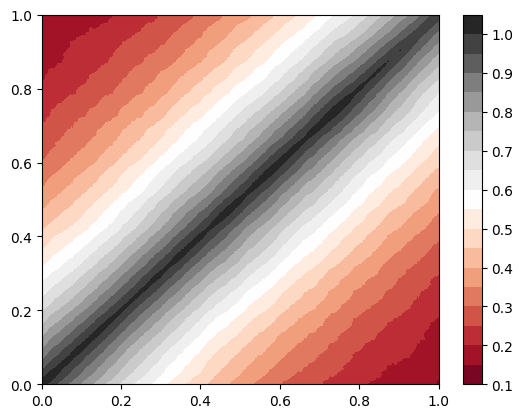

In [7]:
# plot grid
[s_mesh, t_mesh] = np.meshgrid(t_grid, t_grid)
plt.contourf(s_mesh, t_mesh, numerical_cov, 20, cmap='RdGy')
plt.colorbar();

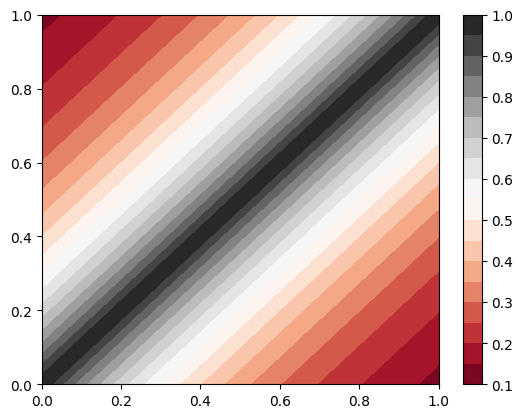

In [8]:
# plot exact covariance
exact = np.exp(-2*np.abs(s_mesh-t_mesh))
plt.contourf(s_mesh, t_mesh, exact, 20, cmap='RdGy')
plt.colorbar();